In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import math

# Problem 1

Part a

In [3]:
all_weeks = pd.read_csv('/Users/violetross/Desktop/id_modeling/Homework/HW4_all_weeks.csv')
all_weeks = np.array(all_weeks)

In [4]:
m, b = np.polyfit(all_weeks[0:15,0], np.log(all_weeks[0:15,1]), 1)
y_line = m * all_weeks[0:15,0] + b

In [27]:
m

0.4386142021238682

/var/folders/6s/xn5ph7893yg5wpz3m4wbcswc0000gn/T/ipykernel_21227/1145811766.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(all_weeks[:,0], np.log(all_weeks[:,1]))


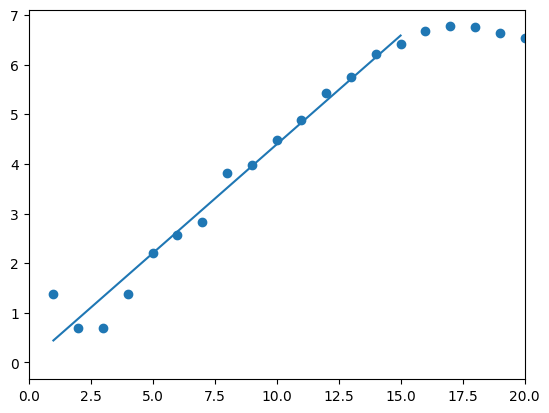

In [12]:
plt.scatter(all_weeks[:,0], np.log(all_weeks[:,1]))
plt.plot(all_weeks[0:15,0], y_line)
plt.xlim(0,20)
plt.savefig('hw4p1.png', dpi=300, bbox_inches = "tight")

In [41]:
summate = 0
n = 15
for i in range(len(all_weeks[0:15,1])):
    summate += (np.log(all_weeks)[i,1] - y_line[i]) ** 2

numer = (summate / (n - 2)) ** (1 / 2)

summate = 0
for i in range(len(all_weeks[0:15,0])):
    summate += (all_weeks[i,0] - np.mean(all_weeks[0:15,0])) ** 2

denom = summate ** (1 / 2)

se = numer / denom
se

/var/folders/6s/xn5ph7893yg5wpz3m4wbcswc0000gn/T/ipykernel_10515/2542667721.py:4: RuntimeWarning: divide by zero encountered in log
  summate += (np.log(all_weeks)[i,1] - y_line[i]) ** 2


0.021466243110972966

# Problem 3

Part a

In [42]:
data = pd.read_csv('/Users/violetross/Desktop/id_modeling/Homework/HW4_Q3_data-1.csv', header = None)
data = np.array(data.iloc[:, 0])
neg = pd.read_csv('/Users/violetross/Desktop/id_modeling/Homework/HW4_Q3_neg-1.csv', header = None)
neg = np.array(neg.iloc[:, 0])
pos = pd.read_csv('/Users/violetross/Desktop/id_modeling/Homework/HW4_Q3_pos-1.csv', header = None)
pos = np.array(pos.iloc[:, 0])

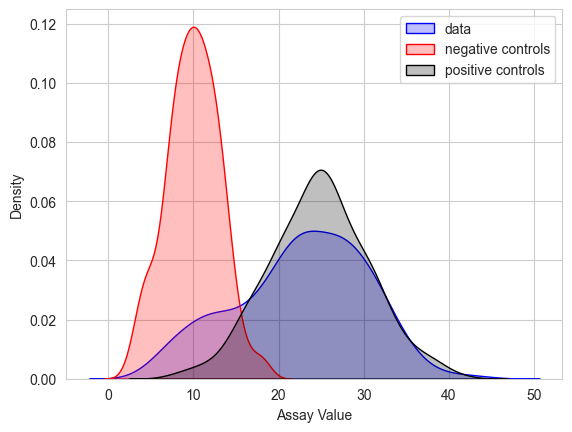

In [87]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")
sns.kdeplot(data, fill=True, color = 'blue', label = 'data')
sns.kdeplot(neg, fill=True, color = 'red', label = 'negative controls')
sns.kdeplot(pos, fill=True, color = 'black', label = 'positive controls')
plt.xlabel("Assay Value")
plt.legend()
plt.savefig('hw4p3a.png', dpi=300, bbox_inches = "tight")

Part b

In [51]:
def se(c):
    global pos
    return(float(sum(pos > c)) / len(pos))
def sp(c):
    global neg
    return(float(sum(neg < c)) / len(neg))
def raw_prev(c):
    global data
    return(float(sum(data > c)) / len(data))
def corr_prev(c):
    theta = (raw_prev(c) - (1 - sp(c))) / (se(c) + sp(c) - 1)
    return(theta)
def J(c):
    return (se(c) + sp(c) - 1)

In [52]:
c_vals = np.sort(np.unique(data))
J_vals = [J(c) for c in c_vals]

In [58]:
youden_optimal = c_vals[np.argmax(np.array(J_vals))]

In [90]:
youden_optimal

14.786720403519933

Part c

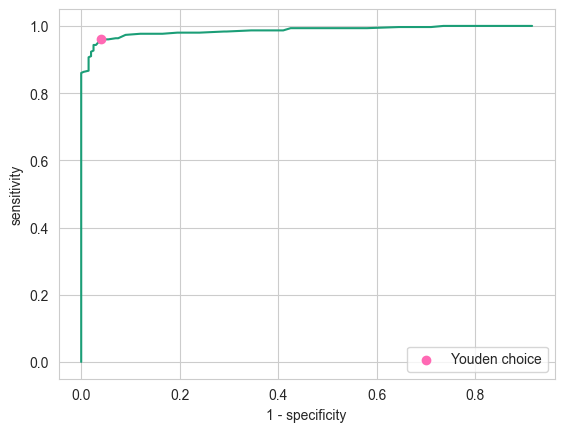

In [88]:
se_vals = [se(c) for c in c_vals]
sp_vals = [1 - sp(c) for c in c_vals]
plt.plot(sp_vals, se_vals)
plt.scatter(1 - sp(youden_optimal), se(youden_optimal), color = 'hotpink', zorder = 2, label = "Youden choice")
plt.xlabel("1 - specificity")
plt.ylabel("sensitivity")
plt.legend()
plt.savefig('hw4p3c1.png', dpi=300, bbox_inches = "tight")

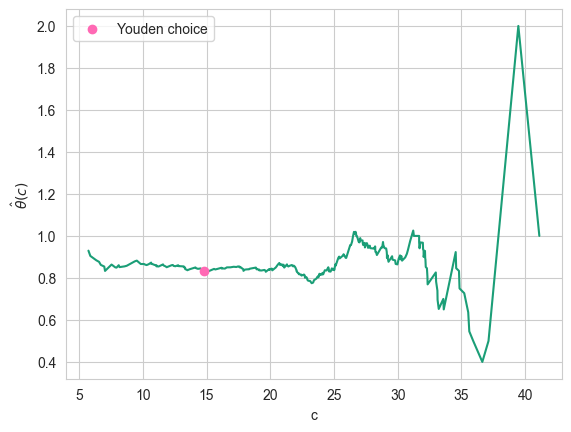

In [89]:
corr_prev_vals = [corr_prev(c) for c in c_vals[1:-1]]
plt.plot(c_vals[1:-1], corr_prev_vals)
plt.scatter(youden_optimal, corr_prev(youden_optimal), color = 'hotpink', zorder = 2, label = "Youden choice")
plt.xlabel("c")
plt.ylabel(r'$\hat{\theta}(c)$')
plt.legend()
plt.savefig('hw4p3c2.png', dpi=300, bbox_inches = "tight")